# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification with Multi-layer Perceptrons

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

In [1]:
import numpy as np
import pickle
from PIL import Image
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time
from math import sqrt
import nnFunctions
import importlib
%matplotlib inline

In [2]:
# run this cell if you modified the nnFunctions.py file and you wish to reload the module
importlib.reload(nnFunctions)

<module 'nnFunctions' from 'C:\\Users\\Eshwar N Kumar\\Desktop\\ESHWAR N KUMAR\\University at Buffalo - Course\uf022Everything\\Spring 2021 Courses\\CSE574-Introduction to ML\\ProgrammingAssignment2\\nnFunctions.py'>

In [3]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [4]:
# load data
train_data,train_label,test_data,test_label = pickle.load(open('AI_quick_draw_sm.pickle','rb'))

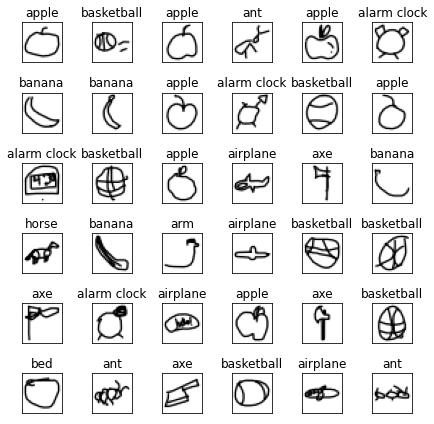

In [5]:
# visualize some images
fig = plt.figure(figsize=[6,6])
for i in range(36):
    ax = plt.subplot(6,6,i+1)    
    ind = np.random.randint(0,train_data.shape[0])
    plt.imshow(train_data[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(train_label[ind])])
plt.tight_layout()

In [6]:
#  Train Neural Network
# set the number of nodes in input unit (not including bias unit)
n_input = train_data.shape[1]

# set the number of nodes in hidden unit or M (not including bias unit)
n_hidden = 60 # you can modify this parameter

# set the number of nodes in output unit
n_class = len(np.unique(train_label)) # this parameter is fixed

# initialize the weights into some random matrices
initial_W1 = nnFunctions.initializeWeights(n_input, n_hidden)
initial_W2 = nnFunctions.initializeWeights(n_hidden, n_class)

# unroll 2 weight matrices into single column vector
initialWeights = np.concatenate((initial_W1.flatten(), initial_W2.flatten()), 0)

# set the regularization hyper-parameter
lambdaval = 4 # you can modify this parameter

args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)

# Train Neural Network using fmin_cg or minimize from scipy,optimize module. 
# Check documentation for a working example
opts = {'maxiter': 50}  # Preferred value.
st = time.time()
nn_params = minimize(nnFunctions.nnObjFunction, initialWeights, jac=True, args=args, method='CG', options=opts)
en = time.time()
# Reshape nnParams from 1D vector into W1 and W2 matrices
W1 = nn_params.x[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
W2 = nn_params.x[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))
print("Training completed in {:.2f} seconds.".format(en-st))

# Test the computed parameters

# find the accuracy on Training Dataset
predicted_label = nnFunctions.nnPredict(W1, W2, train_data)
print('Training set Accuracy: {:.2f}%'.format(100 * np.mean((predicted_label == train_label.astype(float)))))

# find the accuracy on Testing Dataset
predicted_label = nnFunctions.nnPredict(W1, W2, test_data)
print('Test set Accuracy    : {:.2f}%'.format(100 * np.mean((predicted_label == test_label.astype(float)))))

C:\Users\Eshwar N Kumar\Desktop\ESHWAR N KUMAR\University at Buffalo - CourseEverything\Spring 2021 Courses\CSE574-Introduction to ML\ProgrammingAssignment2\nnFunctions.py:34: RuntimeWarning: overflow encountered in exp
  z = 1.0 / (1.0 + np.exp(-z))


Training completed in 13.52 seconds.
Training set Accuracy: 67.26%
Test set Accuracy    : 64.18%


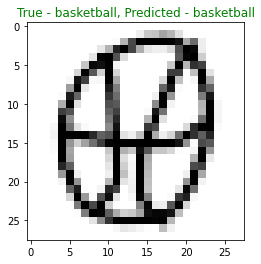

In [41]:
    # visualize prediction on a random image
    rnd_ind = np.random.randint(test_label.shape[0])
    predicted_label = nnFunctions.nnPredict(W1,W2,test_data[rnd_ind:rnd_ind+1,:])
    if predicted_label[0] == test_label[rnd_ind]:
        params = {"text.color" : "green"}
    else:
        params = {"text.color" : "red"}
    plt.rcParams.update(params)

    plt.imshow(test_data[rnd_ind,:].reshape((28,28)),cmap='Greys')
    t = plt.title('True - {}, Predicted - {}'.format(classes[int(test_label[rnd_ind])],classes[int(predicted_label[0])]))